In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [2]:
#importing the mnist dataset
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [8]:
X_test,y_test=X_test/255.,y_test/255.

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

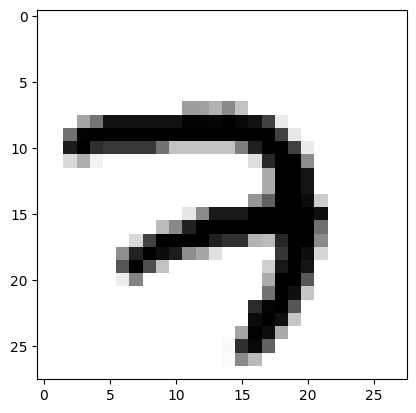

In [5]:
plt.imshow(X_train_full[5000],cmap='binary')
plt.show()

<Axes: >

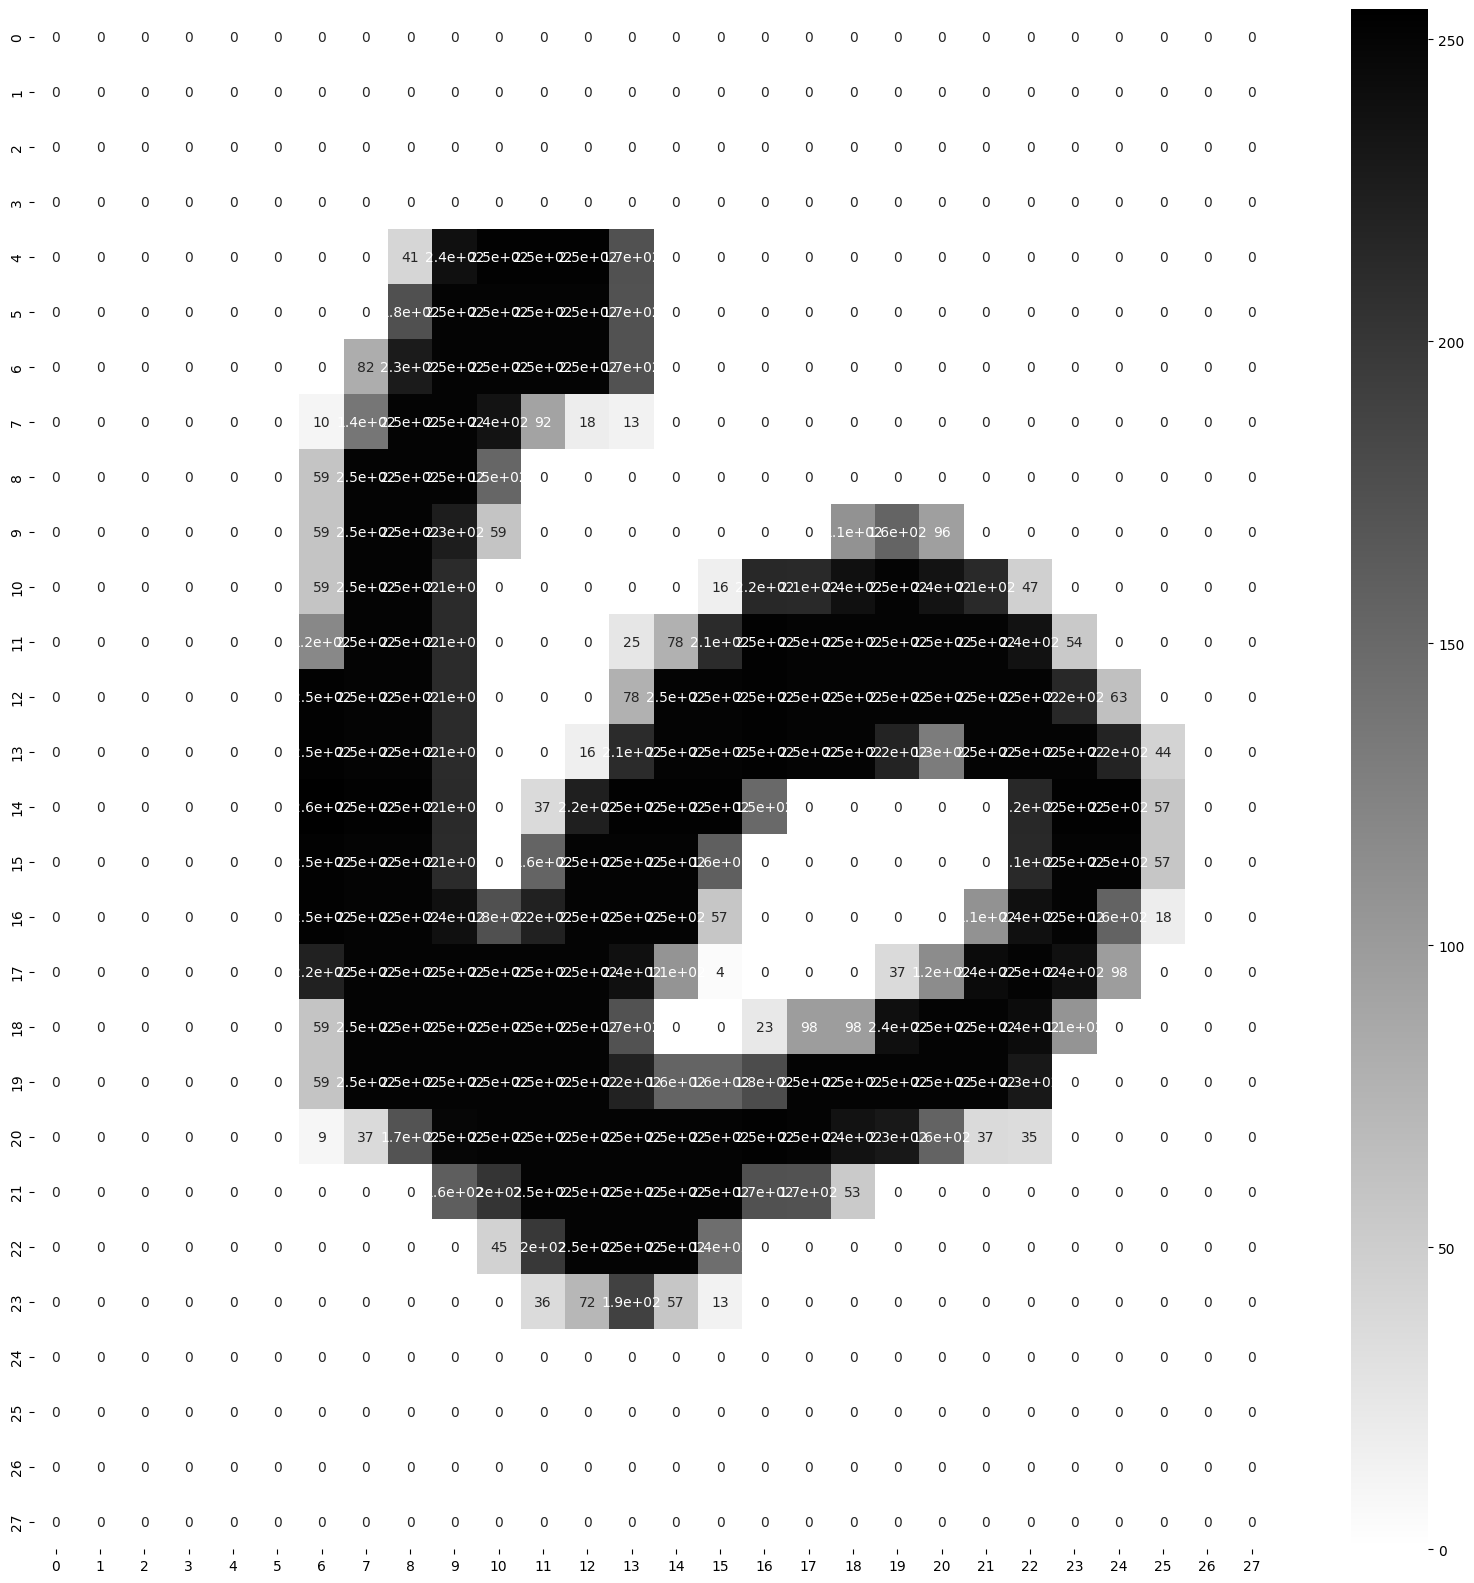

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap='binary')

<Axes: >

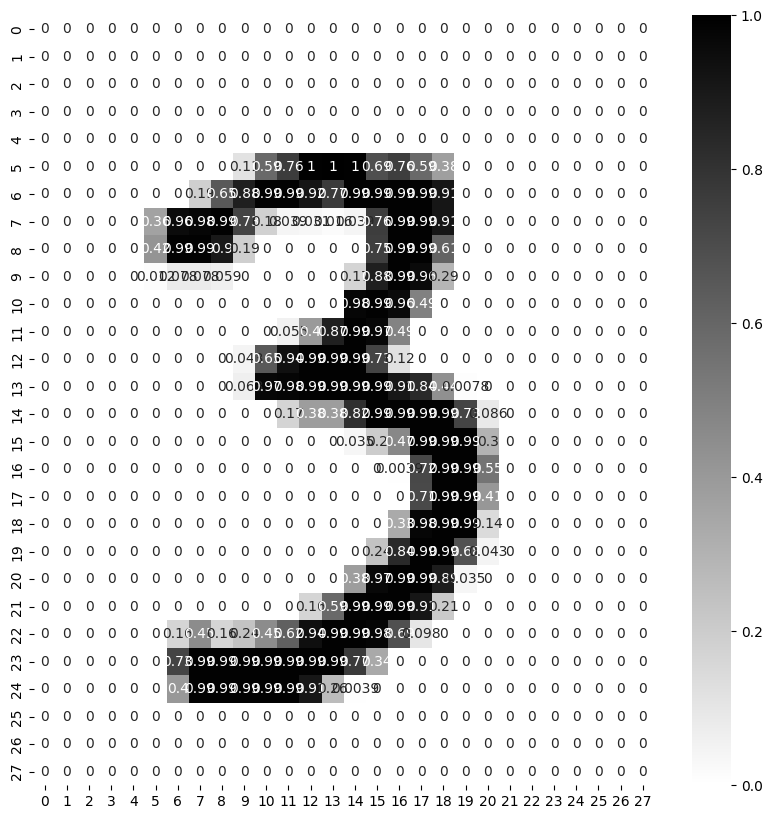

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[5000],annot=True,cmap='binary')

In [15]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer"),
        tf.keras.layers.Dense(units=300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(units=100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(units=10,activation='softmax',name="output_layer")]

In [16]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [17]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_clf.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])
model_clf.layers[1].name


'hiddenlayer1'

In [34]:
hidden1=model_clf.layers[1]
weights1,biases1=hidden1.get_weights()

In [36]:
history=model_clf.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0807 - val_accuracy: 0.9852
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0774 - val_accuracy: 0.9832
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.1010 - val_accuracy: 0.9806
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0906 - val_accuracy: 0.9832
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.1065 - val_accuracy: 0.9830
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0854 - val_accuracy: 0.9846
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.1057 - val_accuracy:

In [41]:
import os
import time
def saveModel_path(model_dir='content/SAVED_MODELS/'):
  os.makedirs(model_dir,exist_ok=True)
  fileName=time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path=os.path.join(model_dir,fileName)
  return model_path

In [42]:
model_clf.save(saveModel_path())

In [43]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [45]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.016600,0.994418,0.080746,0.9852
1,0.012530,0.996345,0.077422,0.9832
2,0.014685,0.995636,0.100966,0.9806
3,0.010233,0.996600,0.090558,0.9832
4,0.013201,0.996018,0.106458,0.9830
5,0.010105,0.996927,0.085446,0.9846
6,0.011600,0.996582,0.105654,0.9838
7,0.008937,0.997182,0.116660,0.9830
8,0.011964,0.996455,0.139910,0.9796
9,0.009524,0.997236,0.102189,0.9830


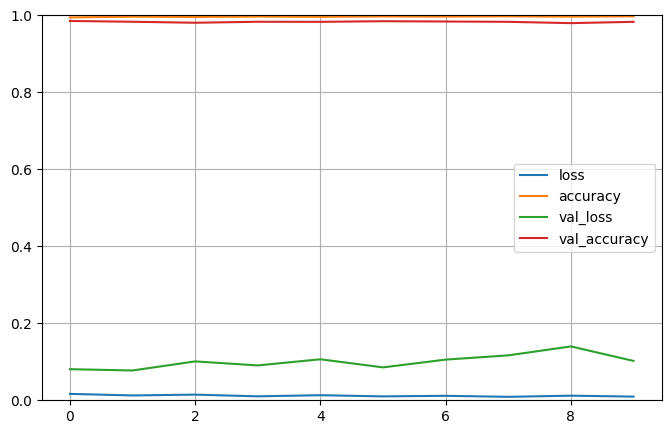

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 43.5091 - accuracy: 0.0972


[43.50912857055664, 0.09719999879598618]

In [52]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 32ms/step


In [54]:
prediction[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [55]:
np.argmax(prediction[0].round(2))

7

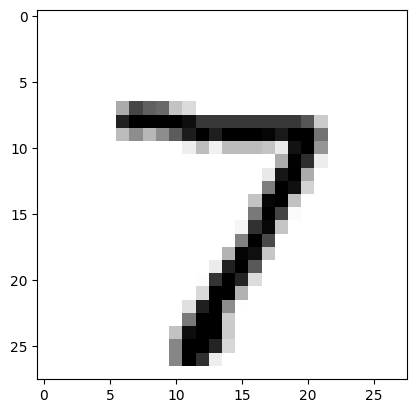

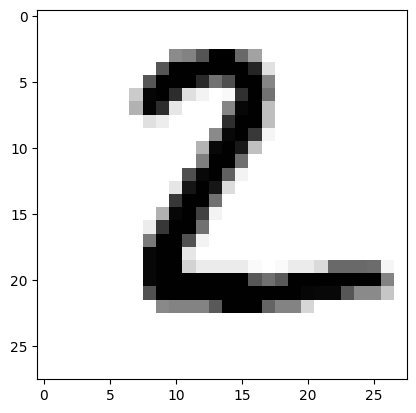

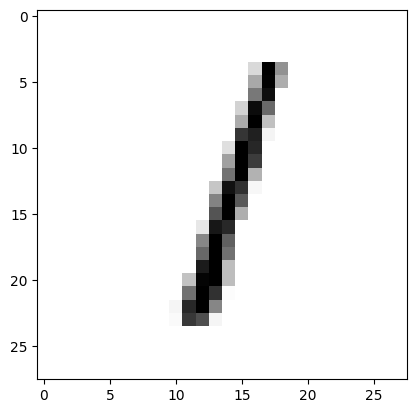

In [58]:
for i in range(0,3):
  plt.imshow(X_test[i],cmap='binary')
  plt.show()

In [ ]:
#so from line 55/56 we can see that we can predict accurately the number "7"